In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, FOLPSAXTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles, LPTVelocileptorsTracerPowerSpectrumMultipoles

template = DirectPowerSpectrumTemplate(z=0.51, fiducial = 'DESI')
theory = FOLPSTracerPowerSpectrumMultipoles(template = template)

In [3]:
#WINDOW MATRIX
window_LRG1 = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/matrices/wmat_LRG1_z0.51_rebin.txt'
window = np.loadtxt(window_LRG1)

#Input wavenumber
kin_LRG1 =  '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/matrices/wmat_kin_LRG1_z0.51_rebin.txt'
kin = np.loadtxt(kin_LRG1)

window.shape, kin.shape

((240, 525), (175,))

In [4]:
kin = np.array(kin)
theory = FOLPSTracerPowerSpectrumMultipoles(template = template) #Define the theory

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


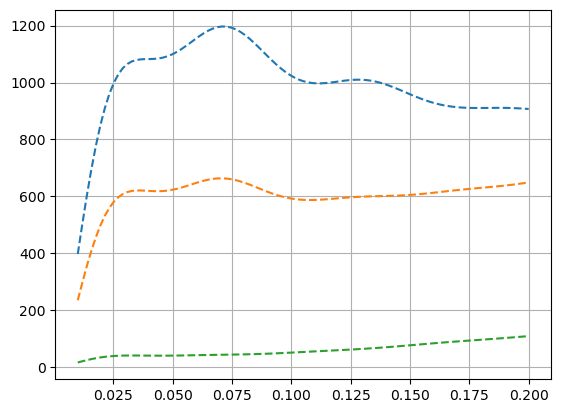

In [5]:
poles = theory() #Generate the multipoles of the theory
for i, e in enumerate(theory.ells):
    plt.plot(theory.k, theory.k * poles[i], '--') #Plot theory multipoles
    
plt.grid()   

In [6]:
#P_thy =np.concatenate((poles[0],poles[1],poles[2]))
#P_thy.shape

#P_obs = np.matmul(window, P_thy)
#P_obs.shape

In [7]:
#Function to cut the covariance matrix and the observable data

def new_data(
    min_k, max_k, pk_data, covariance_data, n_poles
):  # Función para establecer las dimensiones de los datos en función de los límites de k
    import numpy as np

    n = 0
    m = len(pk_data)-1
    for i in range(len(pk_data[:,0:1])):
        if pk_data[:,0:1][i]>min_k:
            n = i
            print('n = ',n)
            break
    for i in range(len(pk_data[:,0:1])):        
        if pk_data[:,0:1][i]>max_k or i ==len(pk_data)-1:
            m = i-1
            print('m = ',m)
            break
    s = int(len(covariance_data[0]) / n_poles)
    p_subfile = pk_data[:, 1:2][n : m + 1]
    if n_poles == 2:
        p = np.vstack((p_subfile, pk_data[:, 2:3][n : m + 1]))
    if n_poles == 3:
        p_1 = np.vstack((p_subfile, pk_data[:, 2:3][n : m + 1]))
        p = np.vstack((p_1, pk_data[:, 3:][n : m + 1]))
    print(
        "Dimensiones del vector de datos de multipolos: ", p.shape
    )  # Creamos un vector con los datos de los 3 multipolos (p0,p2,p4)
    if n_poles == 2:
        mask1 = covariance_data[n : m + 1, n : m + 1]
        mask2 = covariance_data[n : m + 1, n + s : m + 1 + s]
        mask4 = covariance_data[n + s : m + 1 + s, n : m + 1]
        mask5 = covariance_data[n + s : m + 1 + s, n + s : m + 1 + s]
        mask7 = covariance_data[n + (2 * s) : m + 1 + (2 * s), n : m + 1]
        mask8 = covariance_data[n + (2 * s) : m + 1 + (2 * s), n + s : m + 1 + s]
        h1 = np.hstack((mask1, mask2))
        h3 = np.hstack((mask4, mask5))
        h5 = np.hstack((mask7, mask8))
        final1 = np.vstack((h1, h3))
        final = np.vstack((final1, h5))
        new_covariance = final
    if n_poles == 3:
        mask1 = covariance_data[n : m + 1, n : m + 1]
        mask2 = covariance_data[n : m + 1, n + s : m + 1 + s]
        mask3 = covariance_data[n : m + 1, n + (2 * s) : m + 1 + (2 * s)]
        mask4 = covariance_data[n + s : m + 1 + s, n : m + 1]
        mask5 = covariance_data[n + s : m + 1 + s, n + s : m + 1 + s]
        mask6 = covariance_data[n + s : m + 1 + s, n + (2 * s) : m + 1 + (2 * s)]
        mask7 = covariance_data[n + (2 * s) : m + 1 + (2 * s), n : m + 1]
        mask8 = covariance_data[n + (2 * s) : m + 1 + (2 * s), n + s : m + 1 + s]
        mask9 = covariance_data[
            n + (2 * s) : m + 1 + (2 * s), n + (2 * s) : m + 1 + (2 * s)
        ]
        h1 = np.hstack((mask1, mask2))
        h2 = np.hstack((h1, mask3))
        h3 = np.hstack((mask4, mask5))
        h4 = np.hstack((h3, mask6))
        h5 = np.hstack((mask7, mask8))
        h6 = np.hstack((h5, mask9))
        final1 = np.vstack((h2, h4))
        final = np.vstack((final1, h6))
        new_covariance = final
    num_k = [pk_data[:,0:1][n], pk_data[:,0:1][m], (pk_data[:,0:1][m]- pk_data[:,0:1][n]) / (len(p) / n_poles)]
    print(
        "Las dimensiones de la matriz de covarianza son: ", new_covariance.shape
    )  # Creamos una matriz de covarianza nueva, eliminando los datos que exceden los límites de k
    return p, new_covariance, num_k

In [8]:
#Observable data
LRG1 =  '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/pk/pk_LRG1_z0.51_rebin2_ell024.txt'
pk_data = np.loadtxt(LRG1)
print('multipole data: ', pk_data.shape)

#Covariance matrix
cov_data = '/global/cfs/cdirs/desicollab/science/gqc/kp5_eft_comparison/Chains_Abacus_LRG_z0p8/Chains_Velocileptors/DESIY1_tests/DESI_bins/vel_theory/covariances/cov_LRG1_EZmock_unresc.txt'

covariance = np.loadtxt(cov_data)
print('covariance: ', covariance.shape)

multipole data:  (80, 4)
covariance:  (240, 240)


In [9]:
#Cutting and defining the multipole data and the covariance matrix for defined klims, also getting 'k' for the observable klims
pk, cov, k = new_data(0.02,0.2,pk_data, covariance, 2)

n =  4
m =  39
Dimensiones del vector de datos de multipolos:  (72, 1)
Las dimensiones de la matriz de covarianza son:  (72, 72)


In [10]:
#Just making a vector with all the multipole data for all the wavenumbers
data_m1 = pk_data[:,1:2]
data_m2 = pk_data[:,2:3]
data_m3 = pk_data[:, 3:]
data = np.concatenate((data_m1, data_m2, data_m3))
data.shape

(240, 1)

In [11]:
#klims to give to the observable 
k

[array([0.02269322]), array([0.19751868]), array([0.00485626])]

In [15]:
kin.shape

(175,)

In [16]:
#Defining the observable and likelihood

from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable, WindowedPowerSpectrumMultipoles
from desilike.likelihoods import ObservablesGaussianLikelihood
observable = TracerPowerSpectrumMultipolesObservable(data=pk, covariance=cov,
                                                     klim={0: k, 2: k},
                                                     theory=theory,
                                                     kin = kin,
                                                     wmatrix = window,
                                                     )
likelihood = ObservablesGaussianLikelihood(observables=[observable])

likelihood.all_params['b3'].update(fixed = False)
likelihood.all_params['n_s'].update(fixed = False)
likelihood.all_params['n_s'].update(prior={'dist':'norm','loc':0.9649, 'scale':0.048})

PipelineError: Error in method initialize of <desilike.likelihoods.base.ObservablesGaussianLikelihood object at 0x7fbbac238850>

In [18]:
pk_test = np.concatenate((pk_data[:,1:2], pk_data[:,2:3],pk_data[:,3:]))
pk_test.shape

(240, 1)

In [19]:
covariance.shape

(240, 240)

In [23]:
#Defining the observable and likelihood for all the pk_data and cov matrix (without cutting)

from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable, WindowedPowerSpectrumMultipoles
from desilike.likelihoods import ObservablesGaussianLikelihood
observable = TracerPowerSpectrumMultipolesObservable(data=pk_test, covariance=covariance,
                                                     klim={0: [0.02, 0.2, 0.00225], 2: [0.02, 0.2, 0.00225], 4:[0.02, 0.2, 0.00225]},
                                                     theory=theory,
                                                     kin = kin,
                                                     wmatrix = window,
                                                     )
likelihood = ObservablesGaussianLikelihood(observables=[observable])

likelihood.all_params['b3'].update(fixed = False)
likelihood.all_params['n_s'].update(fixed = False)
likelihood.all_params['n_s'].update(prior={'dist':'norm','loc':0.9649, 'scale':0.048})

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


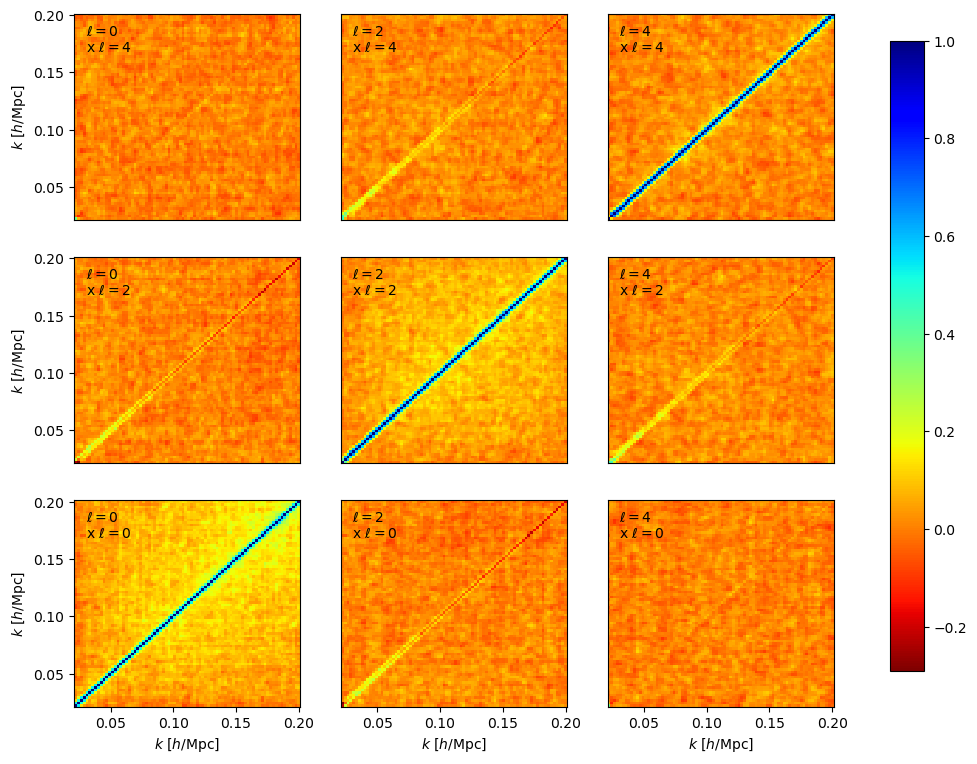

In [25]:
observable.plot_covariance_matrix();

In [34]:
#Defining the observable and likelihood for all the pk_data and cov matrix (without cutting, without klims)

from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable, WindowedPowerSpectrumMultipoles
from desilike.likelihoods import ObservablesGaussianLikelihood
observable = TracerPowerSpectrumMultipolesObservable(data=pk_test, covariance=covariance,
                                                     klim={0: [pk_data[0:1,0:1], pk_data[79:, 0:1], 0.0049], 2: [pk_data[0:1,0:1], pk_data[79:,0:1], 0.0049], 4:[pk_data[0:1,0:1], pk_data[79:,0:1], 0.0049]},
                                                     theory=theory,
                                                     kin = kin,
                                                     wmatrix = window,
                                                     )
likelihood = ObservablesGaussianLikelihood(observables=[observable])

likelihood.all_params['b3'].update(fixed = False)
likelihood.all_params['n_s'].update(fixed = False)
likelihood.all_params['n_s'].update(prior={'dist':'norm','loc':0.9649, 'scale':0.048})

N = 128 sampling points
M matrices have been computed
N = 128 sampling points
M matrices have been computed


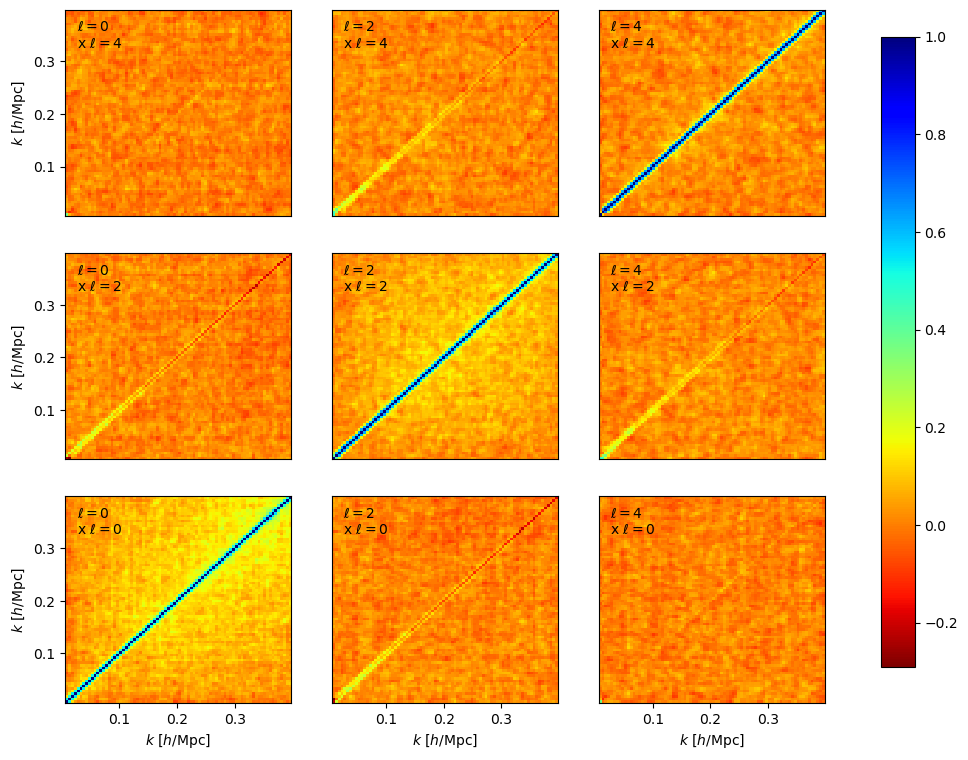

In [35]:
observable.plot_covariance_matrix();

In [ ]:
from desilike import setup_logging
setup_logging()
likelihood()

In [ ]:
from desilike.emulators import Emulator, EmulatedCalculator, TaylorEmulatorEngine

theory.all_params['b3'].update(fixed = False)
theory.all_params['n_s'].update(fixed = False)
theory.all_params['n_s'].update(prior={'dist':'norm','loc':0.9649, 'scale':0.048})

emulator = Emulator(theory, engine=TaylorEmulatorEngine(order = '3'))
emulator.set_samples()
emulator.fit()
emulator.save('FOLPS_emulator_window.npy')

In [ ]:
observable.init.update(theory=emulator.to_calculator())
from desilike.samplers import EmceeSampler

sampler = EmceeSampler(likelihood, save_fn = 'Chains/window_FOLPS_LRG1_z_051_02_mf', seed=42)
sampler.run(check={'max_eigen_gr': 0.15})

In [ ]:
from desilike.samples import Chain, plotting

In [ ]:
chain = Chain.load('Chains/window_FOLPS_LRG1_z_051_02.npy').remove_burnin(0)

In [ ]:
print(chain.to_stats(tablefmt='pretty'))

In [ ]:
from cosmoprimo.fiducial import DESI

cosmo = DESI()

In [ ]:
%matplotlib inline

In [ ]:
plotting.plot_triangle(chain[::10], filled = True, params = ['h','omega_cdm', 'omega_b', 'logA', 'n_s'], 
                       markers = [cosmo['h'], cosmo['omega_cdm'], cosmo['omega_b'], cosmo['logA'], cosmo['n_s']]);
plt.savefig('FOLPSAX_window_test_v1_mf')

In [ ]:
plotting.plot_triangle(chain[::10], filled = True, 
                       markers = [cosmo['h'], cosmo['omega_cdm'], cosmo['omega_b'], cosmo['logA'], cosmo['n_s']]);
plt.savefig('FOLPSAX_window_test_v1_all_params_mf')